Instructions
For this assignment, you need to benchmark the following models using RMSE, MAE and fit-time / prediction-time:

User-based CF with cosine similarity.
User-based CF with pearson correlation similarity.
Item-based CF with cosine similarity.
Item-based CF with pearson correlation similarity.
SVD
NMF
Note :
You should visualize your benchmarking results with a bar chart and to interepret them
You shouldn't implement the models from scratch, you need to use their surprise implementation.

Notebook :

Your notebook should be leasable, well organized and commented. It should contain 3 separate parts :

Data loading
Utils
Model benchmarking
Submission :

You need to push your code in a github repository and to send the link in the assignment tab.

### Data Loading 

In [70]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import KFold
from surprise import KNNWithMeans, KNNBaseline, KNNWithZScore
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
from surprise.prediction_algorithms.matrix_factorization import NMF
plt.rcParams["figure.figsize"] = (8, 6)

In [67]:
filepath = '/home/arun/Documents/mlstuff/timeseries/recommender_sys/data/movie2.csv'
reader = Reader(line_format="user item rating", sep=',', rating_scale=(1, 5))

def load_data(filepath, reader):
    
    data = Dataset.load_from_file(filepath, reader=reader)
    
    return data


In [68]:
data = load_data(filepath, reader)

### Utils 

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.May

In [62]:
def helper (data, typeofalgo, distance, algo):
    print("Type Of Algo- ", typeofalgo)
    print("Distance- ", distance)
    
    #format sim_options    
    if typeofalgo == 'userbased':
        
        sim_options = {
            'name' : distance,
            'user_based' : True
        }
    elif typeofalgo == 'itembased':                                      #is item based
        sim_options = {
            'name' : distance,
            'user_based' : False
        }
    
    
    trainset, testset = train_test_split(data, test_size=.25)
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    RMSE = accuracy.rmse(predictions)
    MAE =  accuracy.mae(predictions)
    
    # Run 5-fold cross-validation and print results.
    #cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    return RMSE, MAE
    

In [64]:
def masterfunction(types, distance):

    algo = [KNNWithMeans, KNNWithZScore, KNNBaseline, SVD,NMF]

    rmse = []
    mae = []
    timelist = []

    for algorithm_names  in algo:
        #print(i)
        algorithm_names =  algorithm_names()

        #print("#User Based, Pearson#")
        start_time = time.time()
        RMSE, MAE  = runof(data, types, distance, algorithm_names)
        time_taken  = time.time() - start_time

        #print(RMSE, MAE)
        rmse.append(RMSE)
        mae.append(MAE)
        timelist.append(time_taken)


    bars = ['KNNWithMeans', 'KNNWithZScore', 'KNNBaseline', 'SVD', 'NMF']    
    y_pos = np.arange(len(bars))
    plt.barh(y_pos, rmse)
    plt.barh(y_pos, mae)

    plt.yticks(y_pos, bars)
    plt.legend(["RMSE",  "MAE"])
    plt.title(distance)
    plt.show()

    x = np.arange(5)
    plt.bar(x,timelist)
    
    plt.xticks(x, bars )
    #plt.figure(figsize=(12, 8))
    plt.show()

### Model and Bench Marking 

Type Of Algo-  userbased
Distance-  pearson
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9177
MAE:  0.7031
Type Of Algo-  userbased
Distance-  pearson
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9185
MAE:  0.6987
Type Of Algo-  userbased
Distance-  pearson
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8856
MAE:  0.6787
Type Of Algo-  userbased
Distance-  pearson
RMSE: 0.8915
MAE:  0.6858
Type Of Algo-  userbased
Distance-  pearson
RMSE: 0.9513
MAE:  0.7324


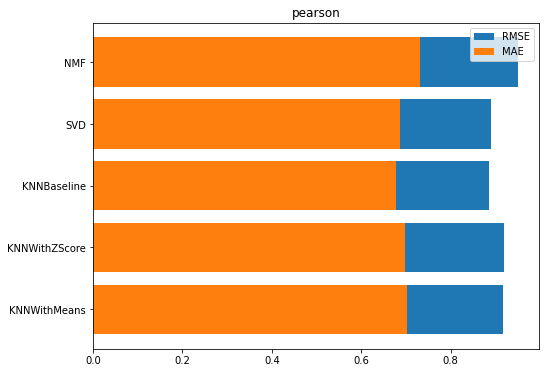

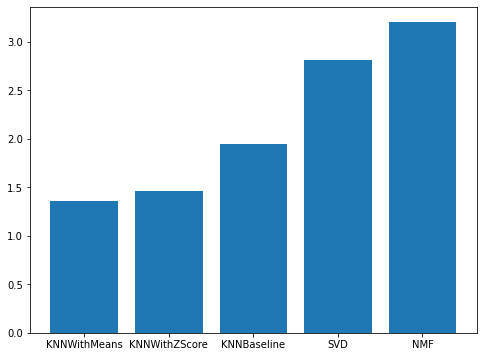

In [71]:
masterfunction('userbased', 'pearson')

Type Of Algo-  itembased
Distance-  cosine
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9206
MAE:  0.7036
Type Of Algo-  itembased
Distance-  cosine
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
MAE:  0.6954
Type Of Algo-  itembased
Distance-  cosine
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8997
MAE:  0.6863
Type Of Algo-  itembased
Distance-  cosine
RMSE: 0.8964
MAE:  0.6903
Type Of Algo-  itembased
Distance-  cosine
RMSE: 0.9508
MAE:  0.7315


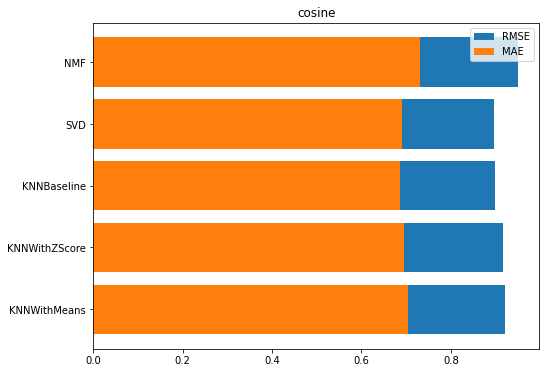

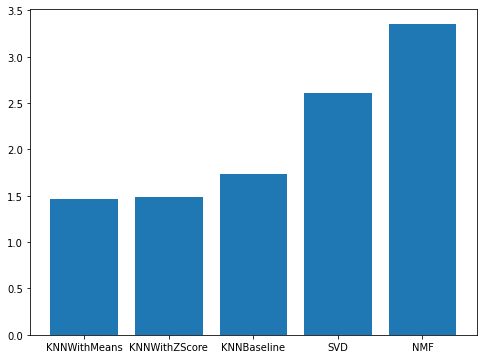

In [72]:
masterfunction('itembased', 'cosine')

Type Of Algo-  userbased
Distance-  cosine
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9207
MAE:  0.7033
Type Of Algo-  userbased
Distance-  cosine
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9216
MAE:  0.7025
Type Of Algo-  userbased
Distance-  cosine
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8903
MAE:  0.6812
Type Of Algo-  userbased
Distance-  cosine
RMSE: 0.9003
MAE:  0.6908
Type Of Algo-  userbased
Distance-  cosine
RMSE: 0.9376
MAE:  0.7213


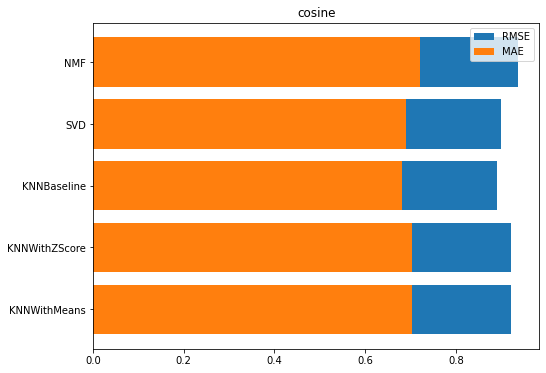

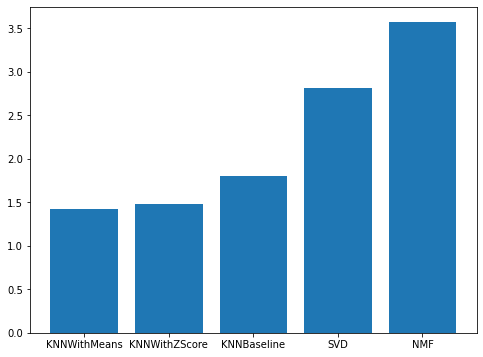

In [73]:
masterfunction('userbased', 'cosine')

Type Of Algo-  itembased
Distance-  pearson
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9227
MAE:  0.7066
Type Of Algo-  itembased
Distance-  pearson
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9228
MAE:  0.7009
Type Of Algo-  itembased
Distance-  pearson
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8948
MAE:  0.6837
Type Of Algo-  itembased
Distance-  pearson
RMSE: 0.8937
MAE:  0.6909
Type Of Algo-  itembased
Distance-  pearson
RMSE: 0.9568
MAE:  0.7365


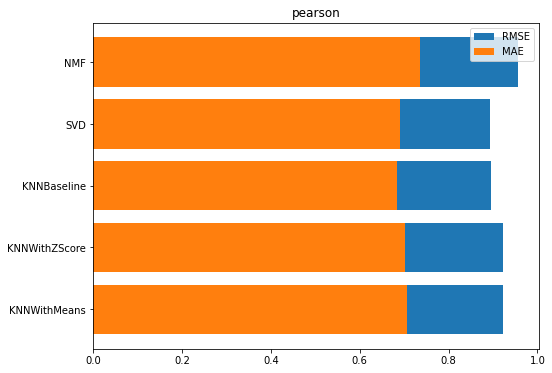

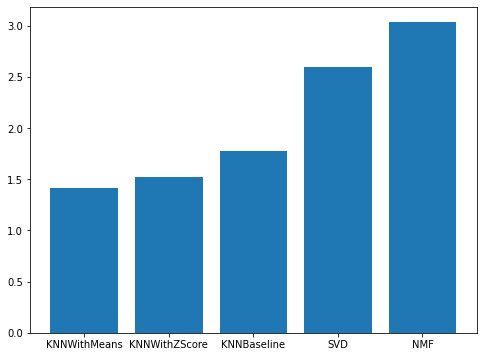

In [74]:
masterfunction('itembased', 'pearson')